In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import os
import cv2
import dlib
import numpy as np
import matplotlib.pyplot as plt
from keras.models import load_model

# Paths and model setup
folder_path = '/content/drive/MyDrive/Colab Data/photos'
model_path = '/content/drive/MyDrive/Colab Data/model_optimal_v3.h5'
detector = dlib.get_frontal_face_detector()
model = load_model(model_path)
emotion_labels = ['angry', 'disgust', 'afraid', 'happy', 'neutral', 'sad', 'surprise']
stressed_emotions = ['sad', 'afraid', 'disgust', 'angry']
non_stressed_emotions = ['happy', 'neutral', 'surprise']

def preprocess_image(gray):
    resized = cv2.resize(gray, (48, 48), interpolation=cv2.INTER_AREA)
    normalized = resized / 255.0
    processed_image = np.expand_dims(normalized, axis=-1)
    processed_image = np.expand_dims(processed_image, axis=0)
    return processed_image

def predict_emotion(processed_image):
    probabilities = model.predict(processed_image)
    return probabilities

def classify_emotions(probabilities):
    stressed_prob = 0
    non_stressed_prob = 0

    for i, label in enumerate(emotion_labels):
        if label in stressed_emotions:
            stressed_prob += probabilities[0][i]
        elif label in non_stressed_emotions:
            non_stressed_prob += probabilities[0][i]

    total = stressed_prob + non_stressed_prob
    if total == 0:  # Avoid division by zero
        return 0
    stress_percentage = (stressed_prob / total) * 100
    return stress_percentage

def analyze_image(image_path):
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    faces = detector(gray)
    stress_levels = []

    for face in faces:
        x, y, w, h = face.left(), face.top(), face.width(), face.height()
        cropped_face = gray[y:y+h, x:x+w]
        processed_image = preprocess_image(cropped_face)
        probabilities = predict_emotion(processed_image)
        stress_level = classify_emotions(probabilities)
        stress_levels.append(stress_level)

    if not stress_levels:  # No faces detected
        return None
    return np.mean(stress_levels)

def main(folder_path):
    stress_results = {}
    for filename in os.listdir(folder_path):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            image_path = os.path.join(folder_path, filename)
            average_stress = analyze_image(image_path)
            stress_results[filename] = average_stress

    for filename, stress in stress_results.items():
        if stress is None:
            print(f"{filename}: No faces detected.")
        else:
            print(f"{filename}: Average Stress Level = {stress:.2f}%")

if __name__ == "__main__":
    main(folder_path)


1/1 [==============================] - 0s 31ms/step
IMG_0172.JPG: Average Stress Level = 1.05%
IMG_0173.JPG: Average Stress Level = 38.07%
IMG_0171.JPG: Average Stress Level = 0.54%


In [ ]:
import dlib
import cv2
import matplotlib.pyplot as plt

In [ ]:
# Load the image
image_path = '/content/drive/MyDrive/Colab Data/sample10.jpg'
image = cv2.imread(image_path)

# Convert the image to grayscale (Dlib works with grayscale images)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [ ]:
import dlib
import cv2
import matplotlib.pyplot as plt

# Load the image
image_path = '/content/drive/MyDrive/Colab Data/sample10.jpg'
image = cv2.imread(image_path)

# Convert the image to grayscale (Dlib works with grayscale images)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

detector = dlib.get_frontal_face_detector()
faces = detector(gray)

for i, face in enumerate(faces):
    x, y, w, h = (face.left(), face.top(), face.width(), face.height())

    # idenitfy and Crop the face (centered)
    cropped_face = image[y:y+h, x:x+w]

    # Save the cropped face depending how many
    cv2.imwrite(f'cropped_face_{i}.jpg', cropped_face)

    # Draw a rectangle around the face on the original image
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

for face in faces:
  x, y, w, h = (face.left(), face.top(), face.width(), face.height())
  cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

import cv2
import numpy as np
from keras.models import load_model

# Load the cnn model
model = load_model('/content/drive/MyDrive/Colab Data/model_optimal_v3.h5')

# Define the emotion labels
emotion_labels = ['angry', 'disgust', 'afraid', 'happy', 'neutral', 'sad', 'surprise']

# Define stressed and non-stressed emotions
stressed_emotions = ['sad', 'afraid', 'disgust', 'angry']
non_stressed_emotions = ['happy', 'neutral', 'surprise']

# Function to preprocess the input image
def preprocess_image(image_path):
    # Load the image
    image = cv2.imread(image_path)
    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Resize to match the input size of the model
    resized = cv2.resize(gray, (48, 48), interpolation=cv2.INTER_AREA)
    # Normalize the pixel values
    normalized = resized / 255.0
    # Expand the dimensions to match the input shape of the model
    processed_image = np.expand_dims(normalized, axis=-1)
    processed_image = np.expand_dims(processed_image, axis=0)
    return image, processed_image

# Function to predict emotion
def predict_emotion(image_path):
    # Preprocess the input image
    image, processed_image = preprocess_image(image_path)
    # Predict the emotion probabilities
    probabilities = model.predict(processed_image)
    return image, probabilities

# Function to classify stressed and non-stressed emotions
def classify_emotions(probabilities):
    stressed_prob = 0
    non_stressed_prob = 0

    for i in range(len(emotion_labels)):
        if emotion_labels[i] in stressed_emotions:
            stressed_prob += probabilities[0][i]
        elif emotion_labels[i] in non_stressed_emotions:
            non_stressed_prob += probabilities[0][i]

    return stressed_prob, non_stressed_prob

# Function to calculate the average stress percentage
def average_stress_percentage(image_paths):
    total_stressed_prob = 0
    total_non_stressed_prob = 0
    num_images = len(image_paths)

    # Iterate over each image
    for image_path in image_paths:
        _, probabilities = predict_emotion(image_path)
        stressed_prob, non_stressed_prob = classify_emotions(probabilities)
        total_stressed_prob += stressed_prob
        total_non_stressed_prob += non_stressed_prob

    # Calculate the average stress percentage
    average_stress_percentage = (total_stressed_prob / (total_stressed_prob + total_non_stressed_prob)) * 100

    return average_stress_percentage

# Test the model with example images
image_paths = ['/content/cropped_face_0.jpg','/content/cropped_face_1.jpg','/content/cropped_face_2.jpg','/content/cropped_face_3.jpg','/content/cropped_face_4.jpg']
average_stress = average_stress_percentage(image_paths)

print("Average Stress Percentage:", average_stress)




In [ ]:
detector = dlib.get_frontal_face_detector()

In [ ]:
faces = detector(gray)

In [ ]:
for i, face in enumerate(faces):
    x, y, w, h = (face.left(), face.top(), face.width(), face.height())

    # idenitfy and Crop the face (centered)
    cropped_face = image[y:y+h, x:x+w]

    # Save the cropped face depending how many
    cv2.imwrite(f'cropped_face_{i}.jpg', cropped_face)

    # Draw a rectangle around the face on the original image
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)


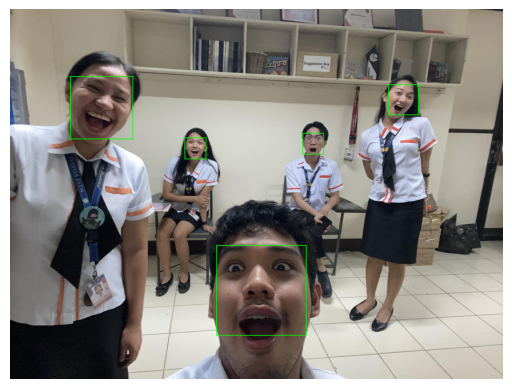

In [ ]:
for face in faces:
    x, y, w, h = (face.left(), face.top(), face.width(), face.height())
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [ ]:
import cv2
import numpy as np
from keras.models import load_model

# Load the cnn model
model = load_model('/content/drive/MyDrive/Colab Data/model_optimal_v3.h5')

# Define the emotion labels
emotion_labels = ['angry', 'disgust', 'afraid', 'happy', 'neutral', 'sad', 'surprise']

# Define stressed and non-stressed emotions
stressed_emotions = ['sad', 'afraid', 'disgust', 'angry']
non_stressed_emotions = ['happy', 'neutral', 'surprise']

# Function to preprocess the input image
def preprocess_image(image_path):
    # Load the image
    image = cv2.imread(image_path)
    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Resize to match the input size of the model
    resized = cv2.resize(gray, (48, 48), interpolation=cv2.INTER_AREA)
    # Normalize the pixel values
    normalized = resized / 255.0
    # Expand the dimensions to match the input shape of the model
    processed_image = np.expand_dims(normalized, axis=-1)
    processed_image = np.expand_dims(processed_image, axis=0)
    return image, processed_image

# Function to predict emotion
def predict_emotion(image_path):
    # Preprocess the input image
    image, processed_image = preprocess_image(image_path)
    # Predict the emotion probabilities
    probabilities = model.predict(processed_image)
    return image, probabilities

# Function to classify stressed and non-stressed emotions
def classify_emotions(probabilities):
    stressed_prob = 0
    non_stressed_prob = 0

    for i in range(len(emotion_labels)):
        if emotion_labels[i] in stressed_emotions:
            stressed_prob += probabilities[0][i]
        elif emotion_labels[i] in non_stressed_emotions:
            non_stressed_prob += probabilities[0][i]

    return stressed_prob, non_stressed_prob

# Function to calculate the average stress percentage
def average_stress_percentage(image_paths):
    total_stressed_prob = 0
    total_non_stressed_prob = 0
    num_images = len(image_paths)

    # Iterate over each image
    for image_path in image_paths:
        _, probabilities = predict_emotion(image_path)
        stressed_prob, non_stressed_prob = classify_emotions(probabilities)
        total_stressed_prob += stressed_prob
        total_non_stressed_prob += non_stressed_prob

    # Calculate the average stress percentage
    average_stress_percentage = (total_stressed_prob / (total_stressed_prob + total_non_stressed_prob)) * 100

    return average_stress_percentage

# Test the model with example images
image_paths = ['/content/cropped_face_0.jpg','/content/cropped_face_1.jpg','/content/cropped_face_2.jpg','/content/cropped_face_3.jpg','/content/cropped_face_4.jpg']
average_stress = average_stress_percentage(image_paths)

print("Average Stress Percentage:", average_stress)


1/1 [==============================] - 0s 25ms/step
Average Stress Percentage: 19.304162585235492


In [ ]:

import cv2
import numpy as np
from keras.models import load_model

# Load the FERPlus model
model = load_model('/content/drive/MyDrive/Colab Data/model_optimal_v3.h5')

# Define the emotion labels
emotion_labels = ['angry', 'disgust', 'afraid', 'happy', 'neutral', 'sad', 'surprise']

# Define stressed and non-stressed emotions
stressed_emotions = ['sad', 'afraid', 'disgust', 'angry']
non_stressed_emotions = ['happy', 'neutral', 'surprise']

# Function to preprocess the input image
def preprocess_image(image_path):
    # Load the image
    image = cv2.imread(image_path)
    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Resize to match the input size of the model
    resized = cv2.resize(gray, (48, 48), interpolation=cv2.INTER_AREA)
    # Normalize the pixel values
    normalized = resized / 255.0
    # Expand the dimensions to match the input shape of the model
    processed_image = np.expand_dims(normalized, axis=-1)
    processed_image = np.expand_dims(processed_image, axis=0)
    return image, processed_image

# Function to predict emotion
def predict_emotion(image_path):
    # Preprocess the input image
    image, processed_image = preprocess_image(image_path)
    # Predict the emotion probabilities
    probabilities = model.predict(processed_image)
    # Get the predicted emotion label and its probability
    predicted_emotion_index = np.argmax(probabilities) #find highest prob
    predicted_emotion_label = emotion_labels[predicted_emotion_index]
    predicted_emotion_probability = probabilities[0][predicted_emotion_index]
    return image, predicted_emotion_label, predicted_emotion_probability

# Function to calculate the  stress percentage for eachh photo
def average_stress_percentage(image_paths):

    num_images = len(image_paths)

    # Iterate over each image
    for image_path in image_paths:
        _, predicted_emotion_label, predicted_emotion_probability = predict_emotion(image_path)
        print(f"Emotion detected in {image_path}: {predicted_emotion_label} with probability {predicted_emotion_probability}")

    return average_stress_percentage

# Test the model with example images
image_paths = ['/content/cropped_face_0.jpg','/content/cropped_face_1.jpg','/content/cropped_face_2.jpg','/content/cropped_face_3.jpg','/content/cropped_face_4.jpg']
average_stress = average_stress_percentage(image_paths)



1/1 [==============================] - 0s 242ms/step
Emotion detected in /content/cropped_face_0.jpg: happy with probability 0.6608548760414124
1/1 [==============================] - 0s 65ms/step
Emotion detected in /content/cropped_face_1.jpg: surprise with probability 0.8085311055183411
1/1 [==============================] - 0s 67ms/step
Emotion detected in /content/cropped_face_2.jpg: happy with probability 0.9416694641113281
1/1 [==============================] - 0s 65ms/step
Emotion detected in /content/cropped_face_3.jpg: happy with probability 0.6495333313941956
1/1 [==============================] - 0s 62ms/step
Emotion detected in /content/cropped_face_4.jpg: angry with probability 0.2611013650894165


In [ ]:
data = emotions[np.argmax(output)]

In [ ]:
data[0]

In [ ]:
import cv2
import numpy as np
from keras.models import load_model
#from tensorflow.keras import models
import tensorflow as tf


# Load the FERPlus model
model = load_model('/content/drive/MyDrive/Colab Data/model_slayage.h5')

# Define the emotion labels
emotion_labels = ['angry', 'disgust', 'afraid', 'happy', 'neutral', 'sad', 'surprise']

# Function to predict emotion
def predict_emotion(image_path):
    # Preprocess the input image
    image, processed_image = preprocess_image(image_path)
    # Predict the emotion probabilities
    probabilities = model.predict(processed_image)
    # Get the index of the highest probability
    predicted_label_index = np.argmax(probabilities)
    # Get the predicted emotion label
    predicted_label = emotion_labels[predicted_label_index]
    return image, predicted_label, probabilities

# Test the model with an example image
image_path = '/content/cropped_face_2.jpg'
image, predicted_emotion, emotion_probabilities = predict_emotion(image_path)
print("Predicted Emotion:", predicted_emotion)
print("Emotion Probabilities:", emotion_probabilities)




1/1 [==============================] - 0s 202ms/step
Predicted Emotion: happy
Emotion Probabilities: [[3.1007749e-03 5.3979620e-06 1.3054544e-03 9.7609824e-01 9.0247812e-04
  2.0944127e-03 1.6493270e-02]]


In [ ]:
# Load the image
image2_path = '/content/sample_data/sample2.jpg'
image2 = cv2.imread(image2_path)

# Convert the image to grayscale (Dlib works with grayscale images)
gray = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

In [ ]:
detector = dlib.get_frontal_face_detector()

In [ ]:
faces = detector(gray)

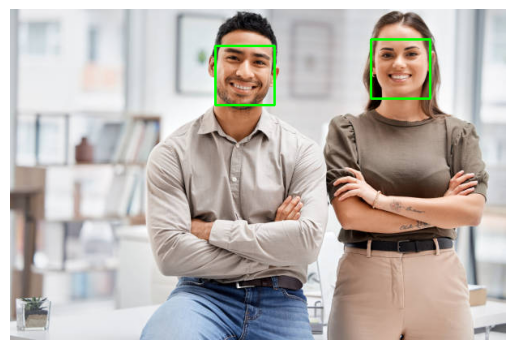

In [ ]:
for face in faces:
    x, y, w, h = (face.left(), face.top(), face.width(), face.height())
    cv2.rectangle(image2, (x, y), (x + w, y + h), (0, 255, 0), 2)

plt.imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [ ]:
# Load the image
image3_path = '/content/sample_data/sample3.jpg'
image3 = cv2.imread(image3_path)

# Convert the image to grayscale (Dlib works with grayscale images)
gray = cv2.cvtColor(image3, cv2.COLOR_BGR2GRAY)

In [ ]:
detector = dlib.get_frontal_face_detector()

In [ ]:
faces = detector(gray)

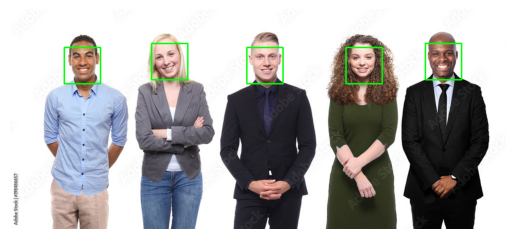

In [ ]:
for face in faces:
    x, y, w, h = (face.left(), face.top(), face.width(), face.height())
    cv2.rectangle(image3, (x, y), (x + w, y + h), (0, 255, 0), 2)

plt.imshow(cv2.cvtColor(image3, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [ ]:
# Load the image
image4_path = '/content/sample_data/hazel.jpg'
image4 = cv2.imread(image4_path)

# Convert the image to grayscale (Dlib works with grayscale images)
gray = cv2.cvtColor(image4, cv2.COLOR_BGR2GRAY)

In [ ]:
detector = dlib.get_frontal_face_detector()

In [ ]:
faces = detector(gray)

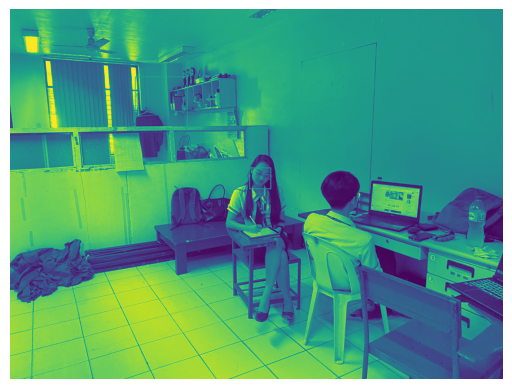

In [ ]:
for face in faces:
    x, y, w, h = (face.left(), face.top(), face.width(), face.height())
    cv2.rectangle(image4, (x, y), (x + w, y + h), (0, 255, 0), 2)

plt.imshow(cv2.cvtColor(image4, cv2.COLOR_BGR2GRAY))
plt.axis('off')
plt.show()

In [ ]:
# Load the image
image5_path = '/content/sample_data/mima1.jpg'
image5 = cv2.imread(image5_path)

# Convert the image to grayscale (Dlib works with grayscale images)
gray = cv2.cvtColor(image5, cv2.COLOR_BGR2GRAY)

In [ ]:
detector = dlib.get_frontal_face_detector()

In [ ]:
faces = detector(gray)

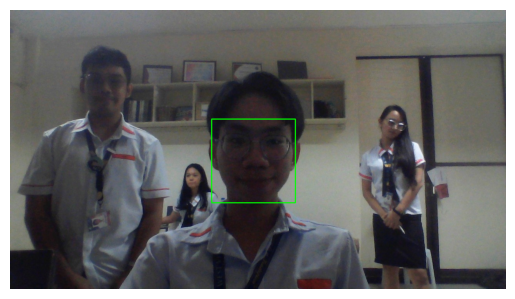

In [ ]:
for face in faces:
    x, y, w, h = (face.left(), face.top(), face.width(), face.height())
    cv2.rectangle(image5, (x, y), (x + w, y + h), (0, 255, 0), 2)

plt.imshow(cv2.cvtColor(image5, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [ ]:
# Load the image
image6_path = '/content/sample_data/mima1.jpg'
image6 = cv2.imread(image6_path)

# Convert the image to grayscale (Dlib works with grayscale images)
gray = cv2.cvtColor(image6, cv2.COLOR_BGR2GRAY)

##**For Dlib 68-point facial landmarks detection**

In [ ]:
import numpy as np
import cv2
import dlib
import imutils
import matplotlib.pyplot as plt
import time
%matplotlib inline

In [ ]:
!wget http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
!bzip2 -dk shape_predictor_68_face_landmarks.dat.bz2

--2024-03-06 07:06:10--  http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
Resolving dlib.net (dlib.net)... 107.180.26.78
Connecting to dlib.net (dlib.net)|107.180.26.78|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64040097 (61M)
Saving to: ‘shape_predictor_68_face_landmarks.dat.bz2’

shape_predictor_68_ 100%[===================>]  61.07M  84.2MB/s    in 0.7s    

2024-03-06 07:06:11 (84.2 MB/s) - ‘shape_predictor_68_face_landmarks.dat.bz2’ saved [64040097/64040097]



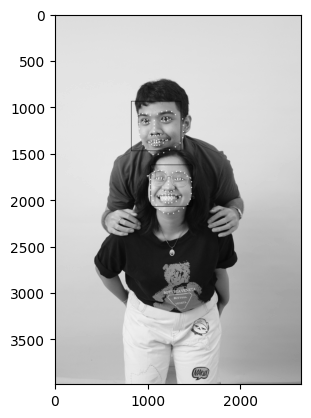

In [ ]:
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")
image = cv2.imread('/content/sample_data/sample.jpg', 0)
faces = detector(image)
for face in faces:
    x1 = face.left()
    y1 = face.top()
    x2 = face.right()
    y2 = face.bottom()
    cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 3)

    landmarks = predictor(image, face)

    for n in range(0, 68):
        x = landmarks.part(n).x
        y = landmarks.part(n).y
        cv2.circle(image, (x, y), 4, (255, 0, 0), 4)
plt.imshow(image, cmap='gray')
plt.show()

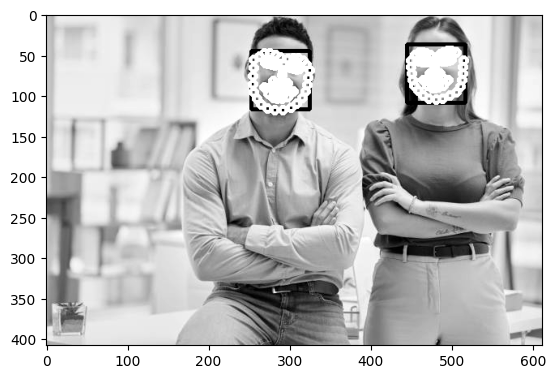

In [ ]:
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")
image2 = cv2.imread('/content/sample_data/sample2.jpg', 0)
faces = detector(image2)
for face in faces:
    x1 = face.left()
    y1 = face.top()
    x2 = face.right()
    y2 = face.bottom()
    cv2.rectangle(image2, (x1, y1), (x2, y2), (0, 255, 0), 3)

    landmarks = predictor(image2, face)

    for n in range(0, 68):
        x = landmarks.part(n).x
        y = landmarks.part(n).y
        cv2.circle(image2, (x, y), 4, (255, 0, 0), 4)
plt.imshow(image2, cmap='gray')
plt.show()